## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Step 1: I'll compute the camera calibration using chessboard images

In [74]:
import cv2
import matplotlib.pyplot as plt; import matplotlib.image as mpimg
import numpy as np
import glob; import pickle
%matplotlib inline

In [52]:
# dimensions of chessboard
nx, ny = 9, 6

# prepare object points (0,0,0), (1,0,0), (2,0,0) .. (8,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[:nx, :ny].T.reshape(-1,2)

# arrays to store object points and image points
objpoints = [] # 3d points in the real world
imgpoints = [] # 2d points in image space 

images = glob.glob('camera_cal/*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # if found, store in objpoints and imagepoints. 
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # draw and display corners
        img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)
        
cv2.destroyAllWindows()

## Step 2: Apply a distortion correction to raw images

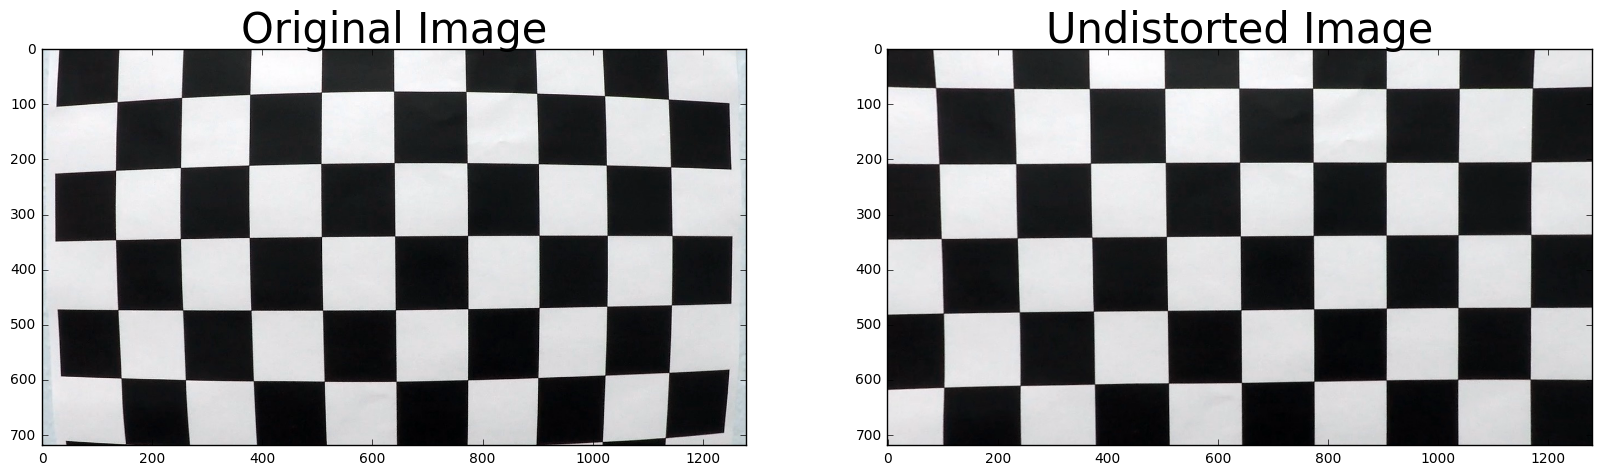

In [70]:
# compute camera calibration matrix and distortion coefficients
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# select a chessboard image exmaple, undistort it
img = cv2.imread(images[0])
img_size = (img.shape[1], img.shape[0])
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('output_images/camera_cal_check.jpg', dst)

# plot the example before and after calibration
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize = 30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize = 30)                                                 

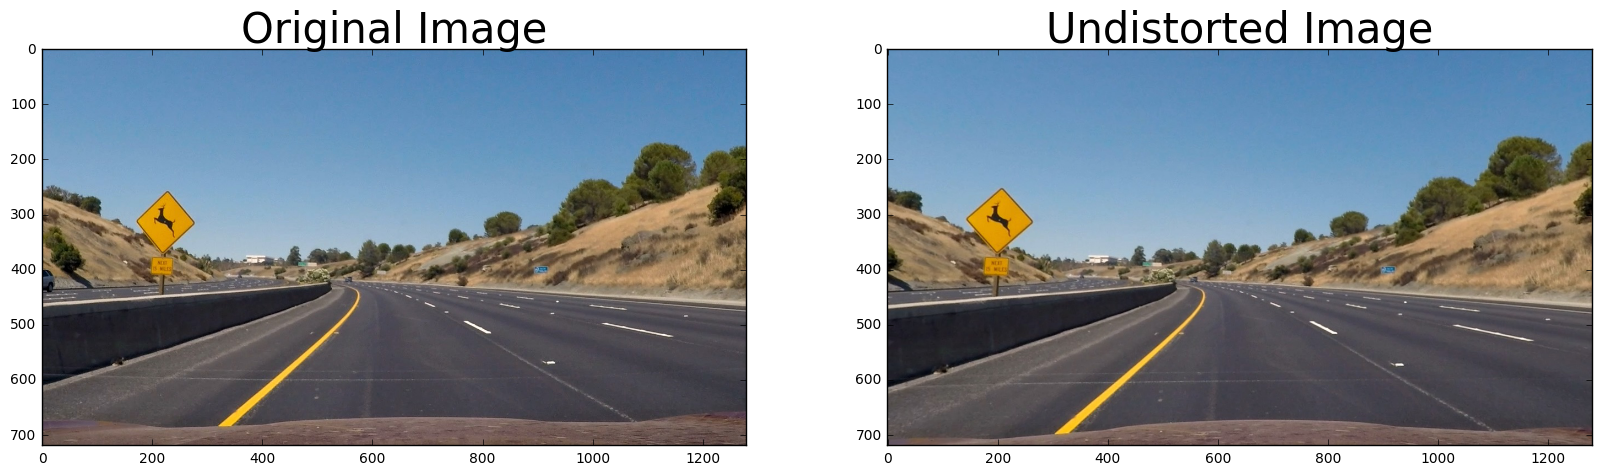

In [85]:
# select a lane example, undistort it
lane_img = cv2.imread('test_images/test2.jpg')
lane_img_size = (lane_img.shape[1], lane_img.shape[0])
lane_dst = cv2.undistort(lane_img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(cv2.cvtColor(lane_img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize = 30)
ax2.imshow(cv2.cvtColor(lane_dst, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize = 30)

In [78]:
# save camera calibration matrix and distortion coefficients
myCalibration = {'mtx': mtx, 'dst': dst}

if not os.path.exists('./output'):
    os.makedirs('./output')

pickle.dump(myCalibration, open("./output/myCalibration.p", "wb"))

myCalibration = pickle.load(open("./output/myCalibration.p", "rb"))

## Step 3: Use color transforms, gradients, etc., to create a thresholded binary image.

In [86]:
lane_img.shape

(720, 1280, 3)

## Step 4: Apply a perspective transform to rectify binary image ("birds-eye view")